# Titanic with neuronal networks

The following code was given from the lecturer and should be expanded to create a neuronal network for the titanic dataset.

In [150]:
import tensorflow as tf
import tensorflow.keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(..., activation='sigmoid', batch_input_shape=(None, 4))) #We have 4 input features
#...
model.add(Dense(1, activation='sigmoid'))
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=opt,
              metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 10)                50        
                                                                 
 dense_71 (Dense)            (None, 1)                 11        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


## Imports

Import the following packages:

In [67]:
import tensorflow as tf
import tensorflow.keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import Dropout

import pandas as pd

import numpy as np

# Nice function to split a known data set to a test and trin set
from sklearn.model_selection import train_test_split

# Nice function for plotting
# Install via pip: pip install tensorflow-history-plot
from tensorflow_history_plot import show_acc

***

Read the data from the csv file and show some infos about the data:

In [2]:
train_data = pd.read_csv("data/train.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data preparation

Define the features we want to use to train our neuronal network

In [68]:
# Read data again in case you have already manipulated it
train_data = pd.read_csv("data/train.csv") 

# Fill missing age in train data
train_data["Age"].fillna(train_data["Age"].median(skipna=True), inplace=True) 

# Define features we want to use
features = ["Pclass", "Survived", "Sex", "Age"]

# Get the features we want to use
train_data = pd.get_dummies(train_data[features])

Show the info of the modified dataset (notice that there should be a equal amount of "not null" values for the columns)

In [69]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Survived    891 non-null    int64  
 2   Age         891 non-null    float64
 3   Sex_female  891 non-null    bool   
 4   Sex_male    891 non-null    bool   
dtypes: bool(2), float64(1), int64(2)
memory usage: 22.7 KB


Split the data into training and test data. Therefore we will first split the data into a "X" and "y" part. The "X" part contains all features and the "y" part contains the label (survived or not). After that we will split the data into training and test data.

In [70]:
X = train_data.drop('Survived', axis=1, inplace=False)
y = train_data['Survived']

print(f'Input features shape: {X.shape}')
print(f'Labels shape: {y.shape}')

Input features shape: (891, 4)
Labels shape: (891,)


Using the `train_test_split` function from the `sklearn.model_selection` package, split the data into training and test data. 
This is an easy and fast way to split the data into training and test data. The function will return 4 values: `X_train`, `X_test`, `y_train` and `y_test`. The `X` values are the features (in our case the columns `Pclass`, `Sex`, `Age`) and the `y` values are the labels (in our case the column `Survived`).

In [71]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
X_train

,Pclass,Age,Sex_female,Sex_male
331,1,45.5,False,True
733,2,23.0,False,True
382,3,32.0,False,True
704,3,26.0,False,True
813,3,6.0,True,False
...,...,...,...,...
106,3,21.0,True,False
270,1,28.0,False,True
860,3,41.0,False,True
435,1,14.0,True,False


## Neural Network

In the following section, the neuronal network is created and trained.

First we have to convert the data into a format that can be used by the neuronal network. Therefore we will use the `asarrray` function from the `numpy` package. This function will convert the data into a numpy array.

In [73]:
X_train = np.asarray(X_train).astype('float32')
X_val = np.asarray(X_val).astype('float32')
y_train = np.asarray(y_train).astype('float32')
y_val = np.asarray(y_val).astype('float32')

The `X` values will be converted into a 2 dimensional array...

In [74]:
X_train

array([[ 1. , 45.5,  0. ,  1. ],
       [ 2. , 23. ,  0. ,  1. ],
       [ 3. , 32. ,  0. ,  1. ],
       ...,
       [ 3. , 41. ,  0. ,  1. ],
       [ 1. , 14. ,  1. ,  0. ],
       [ 1. , 21. ,  0. ,  1. ]], dtype=float32)

... and the `y` values will be converted into a 1 dimensional array.

In [75]:
y_train

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1.

***

Now we will define our neuronal network. Therefore we will use the `Sequential` class from the `keras.models` package. This class will create a new neuronal network. The `Sequential` class will take a list of layers as parameter.

In [83]:
model = Sequential()

After defining our model we will add the layers to our model. Therefore we will use the `add` function. The first layer will be a `Dense` layer with the `sigmoid` activation function. The `Dense` layer will take the number of neurons as first parameter. The second parameter is the activation function. The `input_shape` parameter defines the input shape of the first layer. The input shape is the number of features. In our case the input shape is 4, because we have 4 features.

The last layer will only have one neuron, because we only want to predict one value (survived or not). The activation function will be the `sigmoid` function.

After defining our layers we will set the learning rate of the optimizer and compile the model. Therefore we will use the `compile` function.

In [84]:
model.add(Dense(125, activation='sigmoid', batch_input_shape=(None, 4), name="Layer_1")) #We have 4 input features
model.add(Dense(500, activation='sigmoid', name="Layer_2"))
model.add(Dense(750, activation='sigmoid', name="Layer_3"))
model.add(Dense(1, activation='sigmoid', name="Layer_4"))

# Ask lecturer why this is not possible???
#model.add(Dense(1, activation="softmax", name="Layer_5"))

opt = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=opt,
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 125)               625       
                                                                 
 Layer_2 (Dense)             (None, 500)               63000     
                                                                 
 Layer_3 (Dense)             (None, 750)               375750    
                                                                 
 Layer_4 (Dense)             (None, 1)                 751       
                                                                 
Total params: 440,126
Trainable params: 440,126
Non-trainable params: 0
_________________________________________________________________


Finally we will train our model. Therefore we will use the `fit` function. The `fit` function will take the training data as first parameter, the labels as second parameter, the validation data as third parameter and the number of epochs as fourth parameter. The `fit` function will return a history object. This object contains the loss and accuracy of the training and validation data for each epoch.

In [85]:
#history = model.fit(x, y, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=32)

Epoch 1/50
23/23 [==============================] - 1s 13ms/step - loss: 0.8239 - accuracy: 0.5253 - val_loss: 0.6769 - val_accuracy: 0.5866
Epoch 2/50
23/23 [==============================] - 0s 9ms/step - loss: 0.6705 - accuracy: 0.6236 - val_loss: 0.6982 - val_accuracy: 0.5866
Epoch 3/50
23/23 [==============================] - 0s 8ms/step - loss: 0.6927 - accuracy: 0.5787 - val_loss: 0.6682 - val_accuracy: 0.6089
Epoch 4/50
23/23 [==============================] - 0s 7ms/step - loss: 0.6607 - accuracy: 0.6278 - val_loss: 0.6672 - val_accuracy: 0.6201
Epoch 5/50
23/23 [==============================] - 0s 7ms/step - loss: 0.6706 - accuracy: 0.6067 - val_loss: 0.7777 - val_accuracy: 0.5866
Epoch 6/50
23/23 [==============================] - 0s 8ms/step - loss: 0.6655 - accuracy: 0.6320 - val_loss: 0.6676 - val_accuracy: 0.7654
Epoch 7/50
23/23 [==============================] - 0s 8ms/step - loss: 0.6529 - accuracy: 0.6250 - val_loss: 0.6623 - val_accuracy: 0.6145
Epoch 8/50
23/23 [=

The accuracy can be shwon as simple values...

In [86]:
model.evaluate(X_val, y_val)

6/6 [==============================] - 0s 2ms/step - loss: 0.4274 - accuracy: 0.7933


[0.42738422751426697, 0.7932960987091064]

... or as a nice plot using the `show_acc` function.

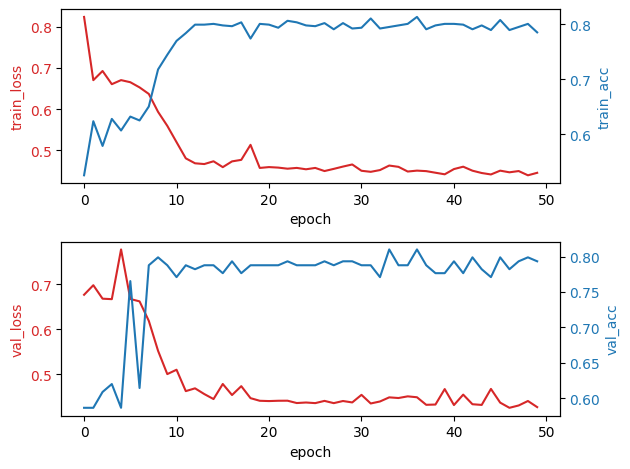

In [87]:
show_acc.plot(history)

## Tests

Now we are ready to predict some values using the given test data set and the trained model.

In [88]:
test_data = pd.read_csv("data/test.csv")

In [89]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


The data preparation is the same as before. We will convert the data into a numpy array and split the data into features and labels.

Notice that the "Survived" column is missing in the test data set. This is because we want to predict the "Survived" column now.

In [93]:
# Read data again in case you have already manipulated it
test_data = pd.read_csv("data/test.csv")

# Fill missing age in train data
test_data["Age"].fillna(train_data["Age"].median(skipna=True), inplace=True) 

# Define features we want to use (again)
features = ['Pclass', 'Sex', 'Age']

##test_data.drop(['Name', 'Ticket', 'PassengerId', 'Cabin', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], axis=1, inplace=True)

test_data = pd.get_dummies(test_data[features])

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   Sex_female  418 non-null    bool   
 3   Sex_male    418 non-null    bool   
dtypes: bool(2), float64(1), int64(1)
memory usage: 7.5 KB


After converting the data into a numpy array we will predict the values using the `predict` function from the model. The `predict` function will take the features as parameter and will return the predicted values.

In [94]:
test_data = np.asarray(test_data).astype('float32')

predictions = model.predict(test_data)
predictions

14/14 [==============================] - 0s 2ms/step


array([[0.08883306],
       [0.55595535],
       [0.12440941],
       [0.09489923],
       [0.56431496],
       [0.11266621],
       [0.59685266],
       [0.19275783],
       [0.52796483],
       [0.09894287],
       [0.09418663],
       [0.32027334],
       [0.95772064],
       [0.12296654],
       [0.94953614],
       [0.8427668 ],
       [0.17434238],
       [0.09894287],
       [0.5908421 ],
       [0.5641894 ],
       [0.28660688],
       [0.16552605],
       [0.95960426],
       [0.4274209 ],
       [0.9485897 ],
       [0.07474607],
       [0.9569259 ],
       [0.09786719],
       [0.34060708],
       [0.09418663],
       [0.1440873 ],
       [0.19675063],
       [0.59705055],
       [0.5935823 ],
       [0.38709947],
       [0.10139019],
       [0.5935823 ],
       [0.5563297 ],
       [0.09624173],
       [0.09418663],
       [0.08467963],
       [0.39551902],
       [0.08280943],
       [0.84992564],
       [0.95133775],
       [0.09624173],
       [0.32425997],
       [0.094

Because the values are not boolean values (what is needed because unless you are a zombie you are either dead or not, nothing between) we will convert the values into boolean values. Therefore we will use the `round` function from the `numpy` package.



In [106]:
predictions = np.where(predictions > 0.5, 1, 0)
predictions = predictions.flatten()
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Export

Finally we will export the predicted values into a csv file. Therefore we will use the `to_csv` function from the `pandas` package.

In [107]:
import os
import time
from datetime import datetime

timestamp = time.time()
timestamp = datetime.fromtimestamp(timestamp).strftime("%H_%M_%S")
print(timestamp)

test_data = pd.read_csv("data/test.csv")

predictions #Enhält die Predictions 0 für Tod 1 für Survived
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})

filename = 'my_submission_nn_' + timestamp + '.csv'
fileDir = os.path.join("export", filename)

output.to_csv(fileDir, index=False)
print("Your submission was successfully saved!")
print(fileDir)


14_24_26
Your submission was successfully saved!
export\my_submission_nn_14_24_26.csv


### Ignore stuff below

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_data["Survived"], test_size=0.2, random_state=42)

y = train_data["Survived"]

features = ["Pclass"]
x = pd.get_dummies(train_data[features])

#...
#model.add(BatchNormalization())
#model.add(Dropout(0.2))
#model.add(Dense(10, activation='sigmoid'))
#model.add(keras.layers.normalization.BatchNormalization())
#model.add(Dropout(0.2))

In [11]:

#model.add(Dense(1, activation='sigmoid', batch_input_shape=(None, 4))) #We have 4 input features
model.add(Dense(10, activation='sigmoid', batch_input_shape=(1,)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=1e-3)

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=opt,
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                20        
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1024)              11264     
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0